## A* Star Algorithm And its Analysis on a given Graph.
 ### The QUESTION:
 Apply the steps of the A* Search algorithm to find the shortest path (optimal path) from A to Z using the following graph. Numbers in orange are heuristic values and the edge weights represent actual values. Display the outputs in a tabular form with the attributes such as, NODE, STATUS (visited or current), SHORTEST DISTANCE FROM NODE A, HEURISTIC DISTANCE TO Z, TOTAL DISTANCE AND PREVIOUS NODE. 

A* SEARCH vs GREEDY BEST-FIRST SEARCH - COMPARISON

📊 VISUALIZING THE GRAPH
----------------------------------------


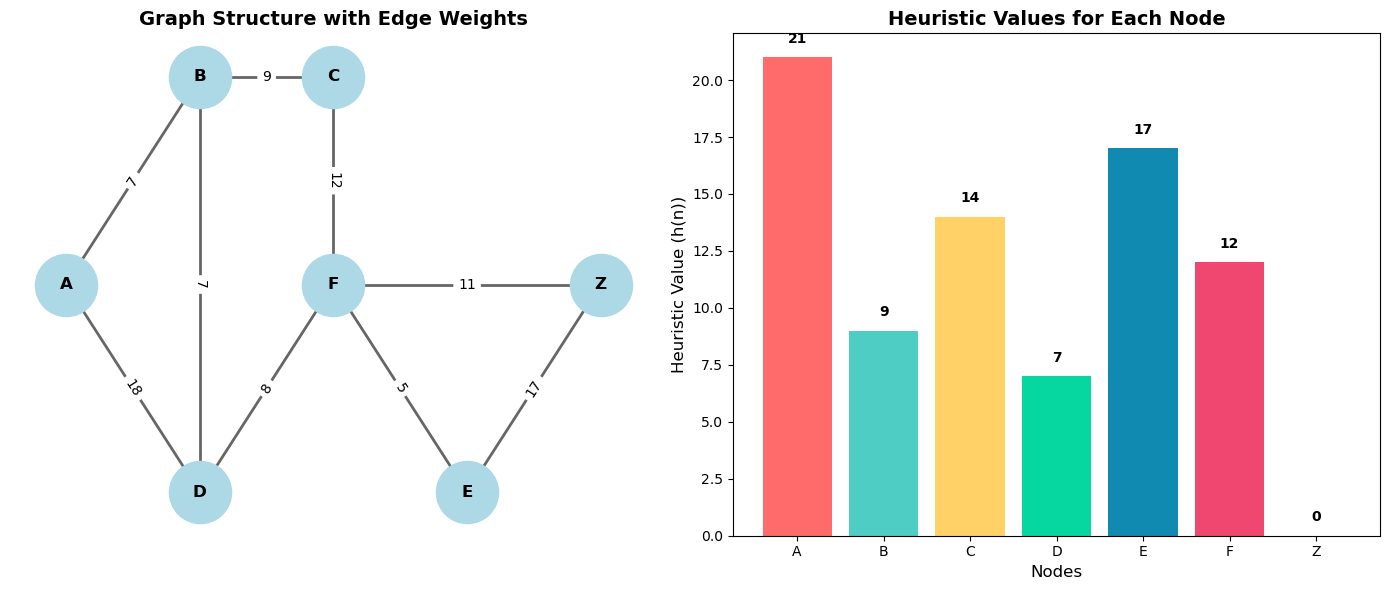


🔍 EXECUTING A* SEARCH ALGORITHM
----------------------------------------

A* Search Steps Table:


Iteration,Current Node,Status,g(n),h(n),f(n),Previous
1,A,Current,0,21,21,-
2,B,Current,7,9,16,A
3,D,Current,14,7,21,B
4,C,Current,16,14,30,B
5,F,Current,22,12,34,D
6,Z,Current,33,0,33,F
7,GOAL REACHED,Success,33,0,33,F



✅ A* Search Result:
   Path: A → B → D → F → Z
   Total Cost: 33


🔍 EXECUTING GREEDY BEST-FIRST SEARCH ALGORITHM
----------------------------------------

Greedy Best-First Search Steps Table:


Iteration,Current Node,Status,Path Cost,h(n),Previous
1,A,Current,0,21,-
2,D,Current,18,7,A
3,B,Current,7,9,A
4,B,Visited,25,9,D
5,F,Current,26,12,D
6,Z,Current,37,0,F
7,GOAL REACHED,Success,37,0,F



✅ Greedy Best-First Search Result:
   Path: A → D → F → Z
   Total Cost: 37


📈 ALGORITHM COMPARISON
----------------------------------------


,Algorithm,Path Found,Total Cost,Optimal,Nodes Explored
0,A* Search,A → B → D → F → Z,33,Yes,5
1,Greedy Best-First Search,A → D → F → Z,37,No,4




🎯 PATH VISUALIZATION
----------------------------------------


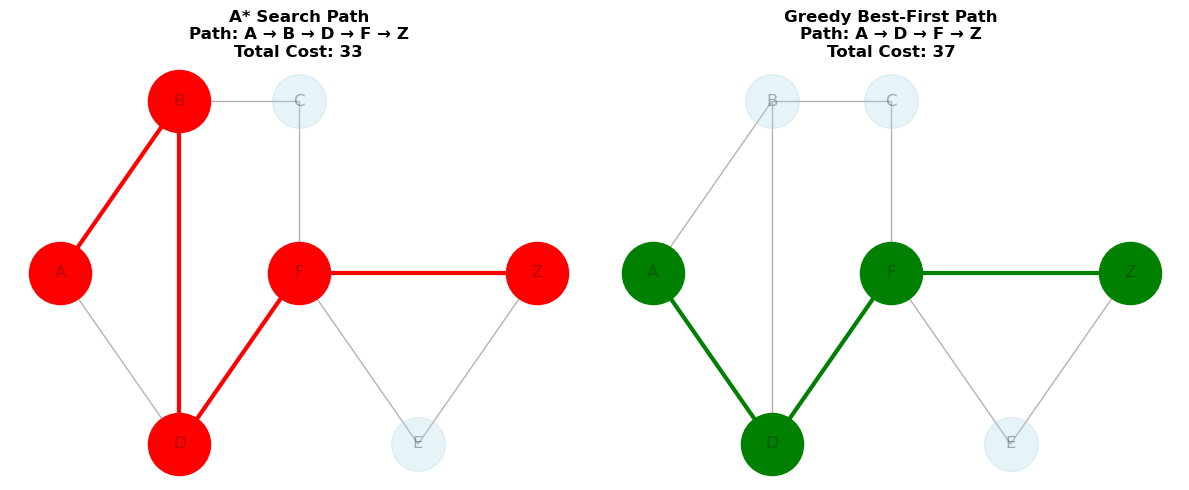


SUMMARY:
1. A* Search found the optimal path with cost 33
2. Greedy Best-First Search found a path with cost 37
3. Difference in cost: 4
4. A* is optimal compared to Greedy


In [ ]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from IPython.display import display, HTML

# -----------------------------------------------------------
# 1. GRAPH DEFINITION
# -----------------------------------------------------------
class Graph:
    def __init__(self):
        self.edges = {
            'A': {'B': 7, 'D': 18},
            'B': {'A': 7, 'C': 9, 'D': 7},
            'C': {'B': 9, 'F': 12},
            'D': {'A': 18, 'B': 7, 'F': 8},
            'E': {'F': 5, 'Z': 17},
            'F': {'C': 12, 'D': 8, 'E': 5, 'Z': 11},
            'Z': {'E': 17, 'F': 11}
        }
        self.heuristics = {
            'A': 21, 'B': 9, 'C': 14, 'D': 7,
            'E': 17, 'F': 12, 'Z': 0
        }

    def neighbors(self, node):
        return self.edges.get(node, {}).items()

# -----------------------------------------------------------
# 2. A* SEARCH ALGORITHM
# -----------------------------------------------------------
def a_star_search(graph, start, goal):
    # Priority queue: (f_score, g_score, node, path)
    open_set = [(graph.heuristics[start], 0, start, [start])]
    heapq.heapify(open_set)
    
    # g_score: cost from start to node
    g_scores = {node: float('inf') for node in graph.edges}
    g_scores[start] = 0
    
    # f_score: g + heuristic
    f_scores = {node: float('inf') for node in graph.edges}
    f_scores[start] = graph.heuristics[start]
    
    visited = {}
    iteration = 0
    steps_table = []
    
    while open_set:
        current_f, current_g, current, path = heapq.heappop(open_set)
        
        # Skip if we found a better path to this node
        if current_g > g_scores[current]:
            continue
            
        # Record step
        steps_table.append({
            'Iteration': iteration + 1,
            'Current Node': current,
            'Status': 'Visited' if current in visited else 'Current',
            'g(n)': current_g,
            'h(n)': graph.heuristics[current],
            'f(n)': current_f,
            'Previous': path[-2] if len(path) > 1 else '-'
        })
        
        visited[current] = True
        
        # Goal check
        if current == goal:
            steps_table.append({
                'Iteration': iteration + 2,
                'Current Node': 'GOAL REACHED',
                'Status': 'Success',
                'g(n)': current_g,
                'h(n)': 0,
                'f(n)': current_g,
                'Previous': path[-2] if len(path) > 1 else '-'
            })
            return path, current_g, steps_table
        
        # Explore neighbors
        for neighbor, weight in graph.neighbors(current):
            tentative_g = current_g + weight
            
            if tentative_g < g_scores[neighbor]:
                # This path is better
                g_scores[neighbor] = tentative_g
                f_score = tentative_g + graph.heuristics[neighbor]
                f_scores[neighbor] = f_score
                
                heapq.heappush(open_set, 
                             (f_score, tentative_g, neighbor, path + [neighbor]))
        
        iteration += 1
    
    return None, float('inf'), steps_table

# -----------------------------------------------------------
# 3. GREEDY BEST-FIRST SEARCH ALGORITHM
# -----------------------------------------------------------
def greedy_best_first_search(graph, start, goal):
    # Priority queue: (heuristic, node, path, cost)
    open_set = [(graph.heuristics[start], start, [start], 0)]
    heapq.heapify(open_set)
    
    visited = {}
    iteration = 0
    steps_table = []
    
    while open_set:
        current_h, current, path, current_cost = heapq.heappop(open_set)
        
        # Record step
        steps_table.append({
            'Iteration': iteration + 1,
            'Current Node': current,
            'Status': 'Visited' if current in visited else 'Current',
            'Path Cost': current_cost,
            'h(n)': current_h,
            'Previous': path[-2] if len(path) > 1 else '-'
        })
        
        visited[current] = True
        
        # Goal check
        if current == goal:
            steps_table.append({
                'Iteration': iteration + 2,
                'Current Node': 'GOAL REACHED',
                'Status': 'Success',
                'Path Cost': current_cost,
                'h(n)': 0,
                'Previous': path[-2] if len(path) > 1 else '-'
            })
            return path, current_cost, steps_table
        
        # Explore neighbors
        for neighbor, weight in graph.neighbors(current):
            if neighbor not in visited:
                new_cost = current_cost + weight
                heapq.heappush(open_set, 
                             (graph.heuristics[neighbor], neighbor, 
                              path + [neighbor], new_cost))
        
        iteration += 1
    
    return None, float('inf'), steps_table

# -----------------------------------------------------------
# 4. VISUALIZATION FUNCTIONS
# -----------------------------------------------------------
def visualize_graph(graph):
    G = nx.Graph()
    
    # Add nodes with heuristic attributes
    for node, h in graph.heuristics.items():
        G.add_node(node, heuristic=h)
    
    # Add edges with weights
    for node, neighbors in graph.edges.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    plt.figure(figsize=(14, 6))
    
    # Position nodes for better visualization
    pos = {
        'A': (0, 1), 'B': (1, 2), 'C': (2, 2), 
        'D': (1, 0), 'E': (3, 0), 'F': (2, 1), 
        'Z': (4, 1)
    }
    
    # Draw the graph
    plt.subplot(1, 2, 1)
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Draw edges with weights
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    
    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title("Graph Structure with Edge Weights", fontsize=14, fontweight='bold')
    plt.axis('off')
    
    # Display heuristic values
    plt.subplot(1, 2, 2)
    colors = ['#FF6B6B', '#4ECDC4', '#FFD166', '#06D6A0', 
              '#118AB2', '#EF476F', '#073B4C']
    
    nodes = list(graph.heuristics.keys())
    heuristics = list(graph.heuristics.values())
    
    bars = plt.bar(nodes, heuristics, color=colors)
    plt.xlabel('Nodes', fontsize=12)
    plt.ylabel('Heuristic Value (h(n))', fontsize=12)
    plt.title('Heuristic Values for Each Node', fontsize=14, fontweight='bold')
    
    # Add value labels on bars
    for bar, h in zip(bars, heuristics):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{h}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def visualize_paths(graph, a_star_path, greedy_path):
    G = nx.Graph()
    
    # Add all nodes and edges
    for node, neighbors in graph.edges.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    plt.figure(figsize=(12, 5))
    
    pos = {
        'A': (0, 1), 'B': (1, 2), 'C': (2, 2), 
        'D': (1, 0), 'E': (3, 0), 'F': (2, 1), 
        'Z': (4, 1)
    }
    
    # Plot A* path
    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_size=1500, 
            node_color='lightblue', width=1, alpha=0.3)
    
    # Highlight A* path
    a_star_edges = [(a_star_path[i], a_star_path[i+1]) 
                    for i in range(len(a_star_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=a_star_edges, 
                          width=3, edge_color='red')
    nx.draw_networkx_nodes(G, pos, nodelist=a_star_path, 
                          node_size=2000, node_color='red')
    
    plt.title(f"A* Search Path\nPath: {' → '.join(a_star_path)}\nTotal Cost: {calculate_path_cost(graph, a_star_path)}", 
              fontsize=12, fontweight='bold')
    
    # Plot Greedy path
    plt.subplot(1, 2, 2)
    nx.draw(G, pos, with_labels=True, node_size=1500, 
            node_color='lightblue', width=1, alpha=0.3)
    
    # Highlight Greedy path
    greedy_edges = [(greedy_path[i], greedy_path[i+1]) 
                    for i in range(len(greedy_path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=greedy_edges, 
                          width=3, edge_color='green')
    nx.draw_networkx_nodes(G, pos, nodelist=greedy_path, 
                          node_size=2000, node_color='green')
    
    plt.title(f"Greedy Best-First Path\nPath: {' → '.join(greedy_path)}\nTotal Cost: {calculate_path_cost(graph, greedy_path)}", 
              fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def calculate_path_cost(graph, path):
    total_cost = 0
    for i in range(len(path)-1):
        total_cost += graph.edges[path[i]][path[i+1]]
    return total_cost

def display_comparison_table(a_star_path, a_star_cost, greedy_path, greedy_cost):
    comparison_data = {
        'Algorithm': ['A* Search', 'Greedy Best-First Search'],
        'Path Found': [' → '.join(a_star_path), ' → '.join(greedy_path)],
        'Total Cost': [a_star_cost, greedy_cost],
        'Optimal': ['Yes' if a_star_cost <= greedy_cost else 'No', 
                   'Yes' if greedy_cost <= a_star_cost else 'No'],
        'Nodes Explored': [len(a_star_path), len(greedy_path)]
    }
    
    df = pd.DataFrame(comparison_data)
    
    # Style the dataframe
    styled_df = df.style.set_properties(**{
        'background-color': '#f7f7f7',
        'border': '1px solid #ddd',
        'padding': '10px',
        'text-align': 'center'
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4CAF50'), 
                                    ('color', 'white'),
                                    ('font-weight', 'bold'),
                                    ('padding', '10px'),
                                    ('border', '1px solid #ddd')]},
        {'selector': 'td', 'props': [('padding', '10px'),
                                    ('border', '1px solid #ddd')]}
    ]).highlight_max(subset=['Total Cost'], color='#FFCCCB')\
      .highlight_min(subset=['Total Cost'], color='#90EE90')
    
    display(styled_df)

# -----------------------------------------------------------
# 5. MAIN EXECUTION
# -----------------------------------------------------------
def main():
    print("=" * 80)
    print("A* SEARCH vs GREEDY BEST-FIRST SEARCH - COMPARISON")
    print("=" * 80)
    
    # Create graph
    graph = Graph()
    
    print("\n VISUALIZING THE GRAPH")
    print("-" * 40)
    visualize_graph(graph)
    
    print("\n EXECUTING A* SEARCH ALGORITHM")
    print("-" * 40)
    a_star_path, a_star_cost, a_star_steps = a_star_search(graph, 'A', 'Z')
    
    # Display A* steps table
    a_star_df = pd.DataFrame(a_star_steps)
    print("\nA* Search Steps Table:")
    display(HTML(a_star_df.to_html(index=False)))
    
    print(f"\n A* Search Result:")
    print(f"   Path: {' → '.join(a_star_path)}")
    print(f"   Total Cost: {a_star_cost}")
    
    print("\n\n EXECUTING GREEDY BEST-FIRST SEARCH ALGORITHM")
    print("-" * 40)
    greedy_path, greedy_cost, greedy_steps = greedy_best_first_search(graph, 'A', 'Z')
    
    # Display Greedy steps table
    greedy_df = pd.DataFrame(greedy_steps)
    print("\nGreedy Best-First Search Steps Table:")
    display(HTML(greedy_df.to_html(index=False)))
    
    print(f"\n Greedy Best-First Search Result:")
    print(f"   Path: {' → '.join(greedy_path)}")
    print(f"   Total Cost: {greedy_cost}")
    
    print("\n\n ALGORITHM COMPARISON")
    print("-" * 40)
    display_comparison_table(a_star_path, a_star_cost, greedy_path, greedy_cost)
    
    print("\n\n PATH VISUALIZATION")
    print("-" * 40)
    visualize_paths(graph, a_star_path, greedy_path)
    
    print("\n" + "=" * 80)
    print("SUMMARY:")
    print("=" * 80)
    print(f"1. A* Search found the optimal path with cost {a_star_cost}")
    print(f"2. Greedy Best-First Search found a path with cost {greedy_cost}")
    print(f"3. Difference in cost: {abs(a_star_cost - greedy_cost)}")
    print(f"4. A* is {'optimal' if a_star_cost <= greedy_cost else 'not optimal'} compared to Greedy")
    print("=" * 80)

# -----------------------------------------------------------
# 6. RUN THE ANALYSIS
# -----------------------------------------------------------
if __name__ == "__main__":
    main()
